<a href="https://colab.research.google.com/github/apriandito/dl-python/blob/main/CNN_Object_Detection_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning for the Fashion-MNIST Dataset**

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. 

Each training and test example is assigned to one of the following labels:

*   0: T-shirt/top
*   1: Trouser
*   2: Pullover
*   3: Dress
*   4: Coat
*   5: Sandal
*   6: Shirt
*   7: Sneaker
*   8: Bag
*   9: Ankle boot

The MIT License (MIT) Copyright © [2017] Zalando SE, https://tech.zalando.com



### **Import Libraries**

In [14]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.5.0


In [15]:
# Additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

### **Load Dataset**

In [16]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist


### **Data Preprocessing**

In [17]:
# Split Dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [18]:
# the data is only 2D!
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


### **Modeling**

In [19]:
# Number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [20]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [21]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5191 - accuracy: 0.8072 - val_loss: 0.4052 - val_accuracy: 0.8495
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3559 - accuracy: 0.8665 - val_loss: 0.3384 - val_accuracy: 0.8723
Epoch 3/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3078 - accuracy: 0.8844 - val_loss: 0.3123 - val_accuracy: 0.8876
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2733 - accuracy: 0.8967 - val_loss: 0.3069 - val_accuracy: 0.8878
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2483 - accuracy: 0.9075 - val_loss: 0.3011 - val_accuracy: 0.8938
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2281 - accuracy: 0.9147 - val_loss: 0.2993 - val_accuracy: 0.8924
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2056 - accuracy: 0.9204 - val_loss: 0.2965 - val_accuracy:

### **Model Evaluation**

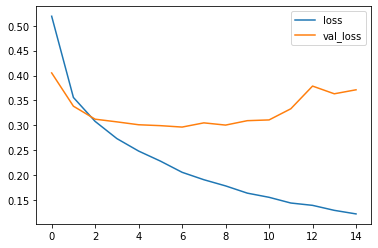

In [22]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

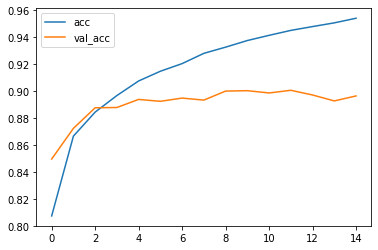

In [23]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[820   3  27  14   2   1 127   0   6   0]
 [  1 972   2  15   3   0   4   0   3   0]
 [  8   1 886   8  37   0  57   0   3   0]
 [  6   7  19 911  26   0  31   0   0   0]
 [  0   1 108  39 783   0  68   0   1   0]
 [  0   0   0   2   0 970   0  21   3   4]
 [ 82   1  83  22  88   0 710   0  14   0]
 [  0   0   0   0   0   8   0 974   1  17]
 [  2   1   2   2   2   2   5   4 980   0]
 [  1   0   0   0   0   5   0  35   1 958]]


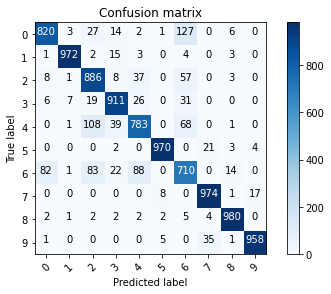

In [24]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [25]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

### **Show Classification Example**

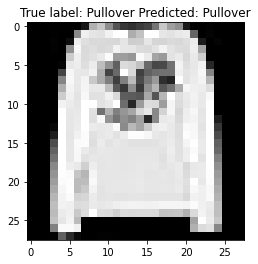

In [29]:
# Show some misclassified examples
trueclassified_idx = np.where(p_test == y_test)[0]
i = np.random.choice(trueclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

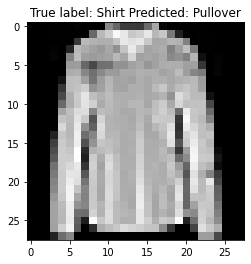

In [30]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));